In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaB

In [13]:
weather=pd.read_csv("weather.csv")
weather.head()
                    

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


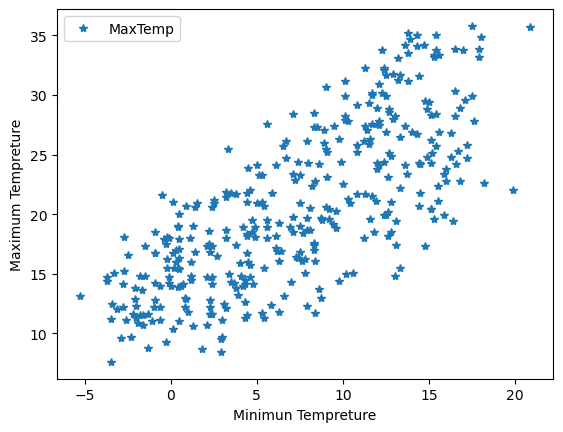

In [14]:
weather.plot(x='MinTemp',y='MaxTemp' ,style='*')
plt.xlabel('Minimun Tempreture')
plt.ylabel('Maximum Tempreture')
plt.show()


<Figure size 2000x1500 with 0 Axes>

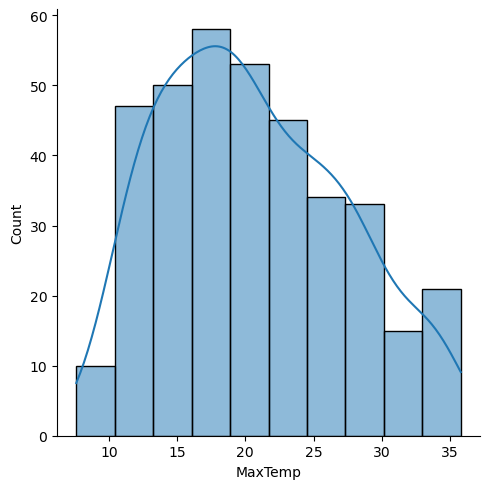

In [15]:
plt.figure(figsize=(20,15))
plt.tight_layout()
seaB.displot(weather['MaxTemp'], kde=True)
plt.show()

DATA SPLICING

In [16]:
from sklearn.model_selection import train_test_split #this is for splicing

In [17]:
X=weather['MaxTemp'].values.reshape(-1,1)
Y=weather['MinTemp'].values.reshape(-1,1)

In [18]:
xTrain, xTest, yTrain, yTest= train_test_split(X,Y,test_size=0.2,random_state=0)

TRAINING THE ALGORTHIM

In [19]:
from sklearn.linear_model import LinearRegression # this is for training using 

In [20]:
regressor=LinearRegression()
regressor.fit(xTrain,yTrain)

LinearRegression()

INTERCEPT & COEFFICIENT

In [33]:
print('Intercept: ',regressor.intercept_)
print('Coefficient: ',regressor.coef_)

Intercept:  [-6.40608092]
Coefficient:  [[0.66505072]]


PREDICTIONS

In [24]:
y_values=regressor.predict(xTest)
actual_predict= pd.DataFrame({'Actual':yTest.flatten(),'Predicted':y_values.flatten()})
actual_predict

,Actual,Predicted
0,10.8,10.353197
1,-1.8,1.242002
2,15.5,7.626489
3,13.3,8.358045
4,15.1,7.160954
...,...,...
69,6.9,6.163378
70,16.0,8.757075
71,8.4,4.301236
72,12.7,10.286692


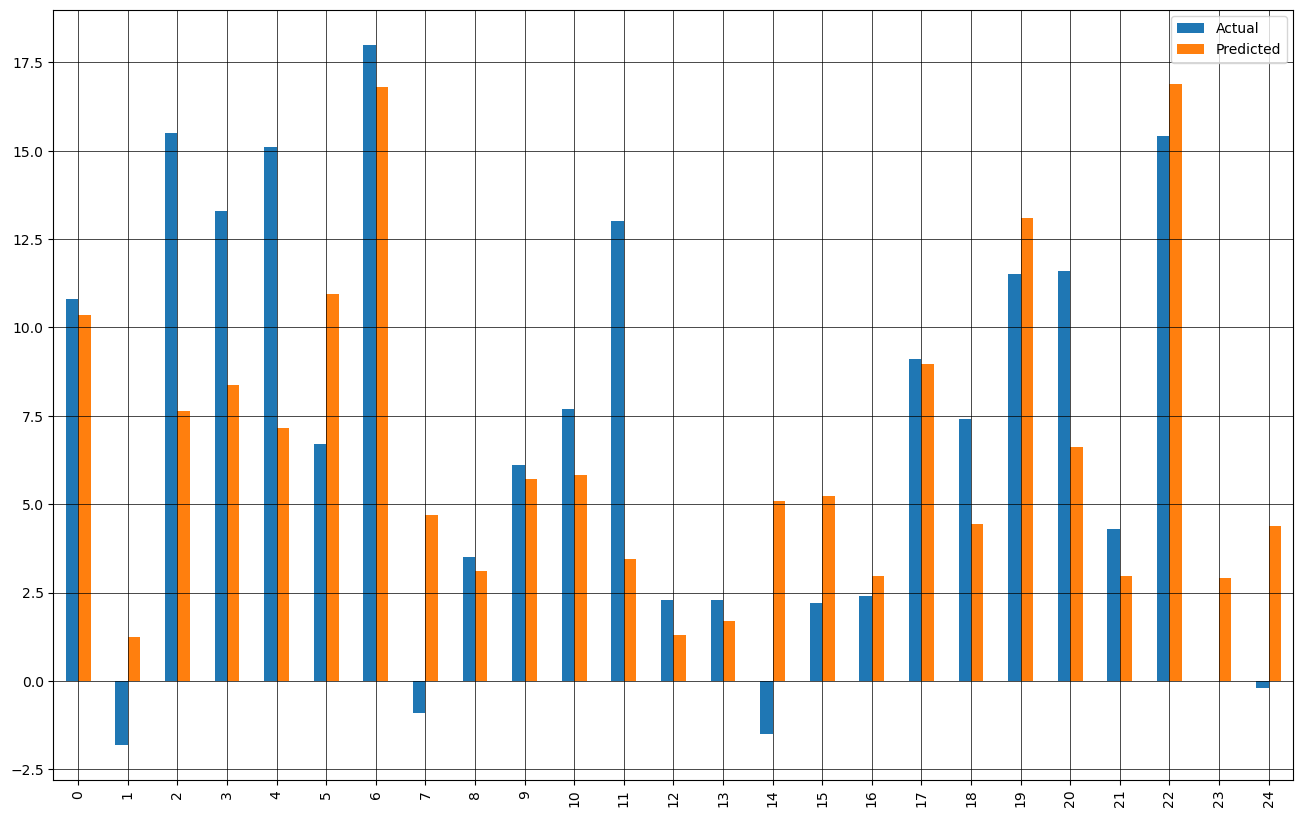

In [28]:
df=actual_predict.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='black')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='green')    
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

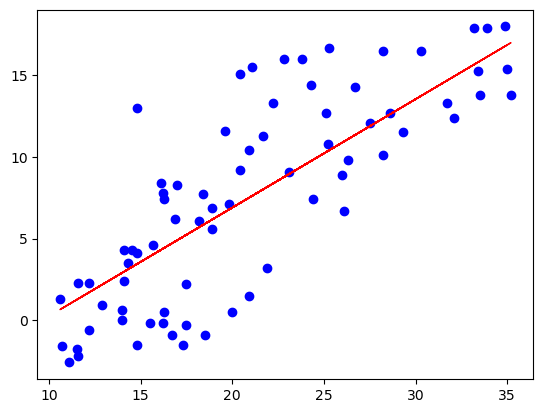

In [30]:
plt.scatter(xTest,yTest,color='blue')
plt.plot(xTest,y_values,color='red',linewidth=1)
plt.show

In [31]:
from sklearn import metrics

In [32]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(yTest,y_values))
print('Mean Squared Error: ',metrics.mean_squared_error(yTest,y_values))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(yTest,y_values)))

Mean Absolute Error:  2.989461808296577
Mean Squared Error:  13.767597595791981
Root Mean Squared Error:  3.710471344154538


CLASSIFICATION ALGORITHMS